# **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading data and showing graph with networkx

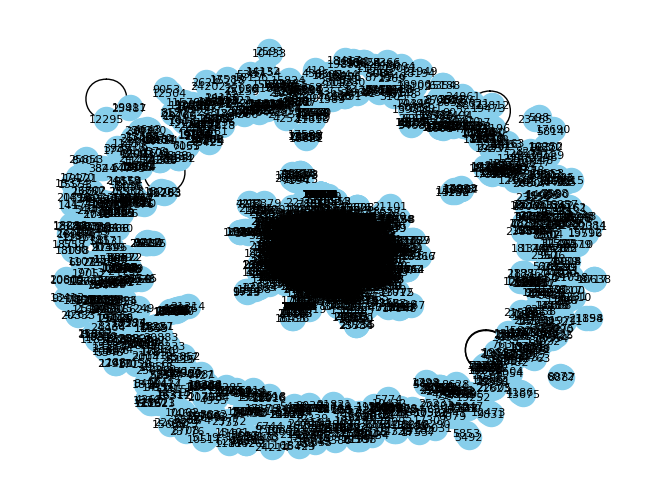

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CA-GrQc.csv')
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row['FromNodeId'], row['ToNodeId'])
nx.draw(G, with_labels=True,node_size=300, node_color='skyblue', font_size=8)
plt.show()

# visualizing by gephi

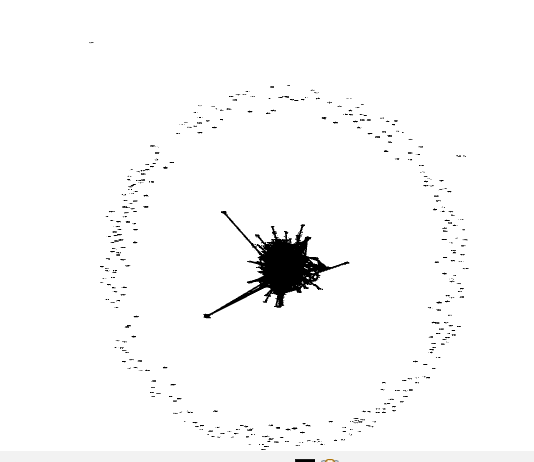

# network metrics:

In [4]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
diameters = []
average_shortest_path_lengths = []
for component in nx.connected_components(G):
    subgraph = G.subgraph(component)
    diameters.append(nx.diameter(subgraph))
    average_shortest_path_lengths.append(nx.average_shortest_path_length(subgraph))
diameter = max(diameters)
average_path_length = sum(average_shortest_path_lengths) / len(average_shortest_path_lengths)
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Average Degree: {average_degree:.2f}")
print(f"Density: {density:.4f}")
print(f" Diameter of Components: {diameter:.2f}")
print(f"Average Shortest Path Length of Components: {average_path_length:.4f}")

Number of Nodes: 5242
Number of Edges: 14496
Average Degree: 5.53
Density: 0.0011
 Diameter of Components: 17.00
Average Shortest Path Length of Components: 1.1333


# تحلیل معیارها:

1. تعداد گره‌ها (Number of Nodes: 5242):
   - شبکه شامل 5242 گره است.
2. تعداد یال‌ها (Number of Edges: 14496):
   - شبکه دارای 14496 یال است. هر یال نمایانگر یک ارتباط یا لینک بین دو گره است. این نشان‌دهنده تعداد کل ارتباطات یا تعاملات بین گره‌های شبکه است.
3. میانگین درجه (Average Degree: 5.53):
   - میانگین درجه شبکه 5.53 است. این عدد نشان‌دهنده میانگین تعداد ارتباطاتی است که هر گره در شبکه دارد. به عبارت دیگر، هر گره به طور متوسط با 5.53 گره دیگر متصل است.
4. (Density: 0.0011):
   - Density شبکه 0.0011 است. Density شبکه نسبت یال‌های موجود به حداکثر تعداد یال‌های ممکن در شبکه است. مقدار Density پایین نشان می‌دهد که شبکه نسبتاً کم‌تراکم است و فقط بخش کوچکی از تمامی ارتباطات ممکن بین گره‌ها وجود دارد.
5. میانگین قطر اجزا (Average Diameter of Components: 17.00):
   - میانگین قطر اجزای شبکه 17.00 است. قطر ز در شبکه، طولانی‌ترین مسیر کوتاه بین هر دو گره است. میانگین قطر 17 نشان می‌دهد که در هر جز شبکه، طولانی‌ترین مسیر بین دو گره به طور متوسط 17 یال است.
6. میانگین طول کوتاه‌ترین مسیر اجزا (Average Shortest Path Length of Components: 1.1333):
   - میانگین طول کوتاه‌ترین مسیر در اجزای شبکه 1.1333 است. این مقدار نشان‌دهنده میانگین طول کوتاه‌ترین مسیر بین هر دو گره در اجزای مختلف شبکه است. مقدار پایین نشان می‌دهد که اکثر گره‌ها در اجزای شبکه به هم نزدیک هستند و برای رسیدن از یک گره به گره دیگر به تعداد کمی یال نیاز است.

این تحلیل‌ها نشان می‌دهد که شبکه دارای تعداد زیادی گره و یال است اما Density پایینی دارد. همچنین قطر و میانگین طول کوتاه‌ترین مسیر اجزای شبکه نشان‌دهنده ساختار نسبتاً پراکنده و گره‌های به هم نزدیک در داخل اجزا است.


<HTML> <BODY> <h1>Degree Report </h1> <hr><br> <h2> Results: </h2>Average Degree: 5.529<br /><br />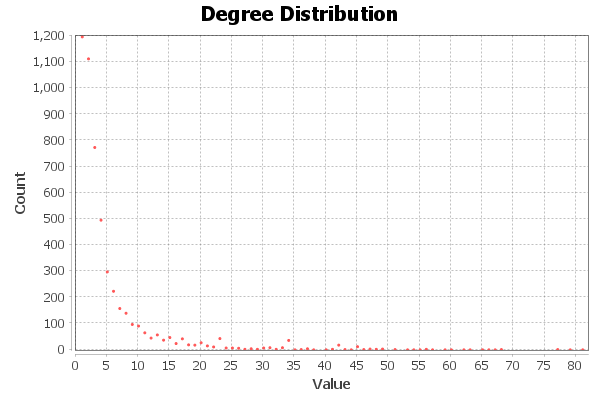</IMG></BODY></HTML>
<HTML> <BODY> <h1>Graph Distance  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br /><br /> <h2> Results: </h2>Diameter: 17<br />Radius: 0<br />Average Path length: 6.04851437671036<br />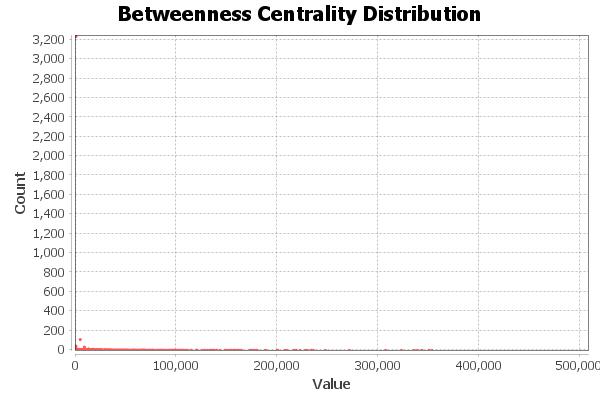</IMG><br /><br />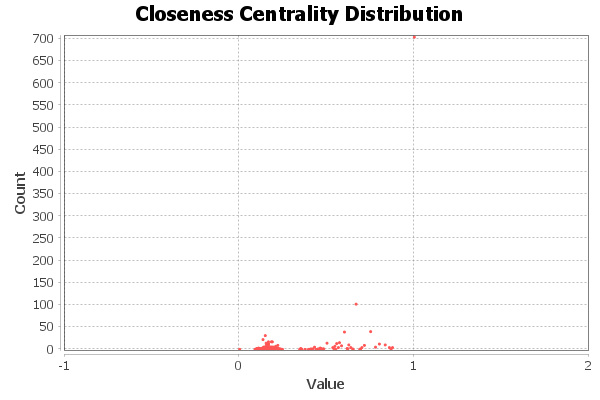</IMG><br /><br />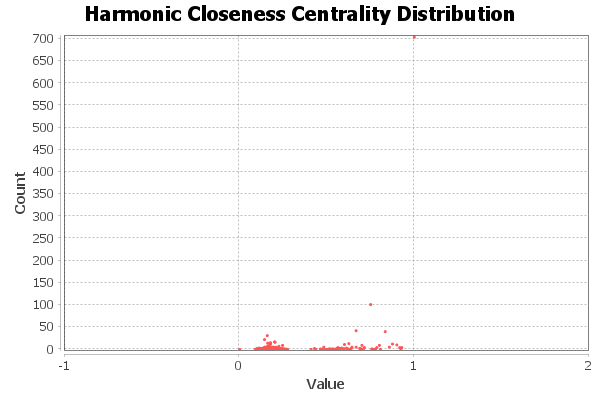</IMG><br /><br />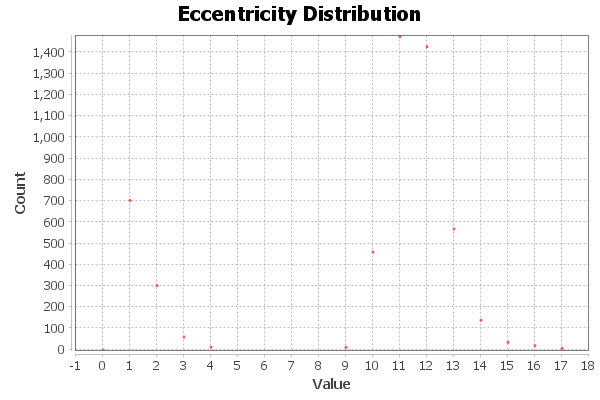</IMG><br /><br /><h2> Algorithm: </h2>Ulrik Brandes, <i>A Faster Algorithm for Betweenness Centrality</i>, in Journal of Mathematical Sociology 25(2):163-177, (2001)<br /></BODY> </HTML>
<HTML> <BODY> <h1>Graph Density  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br><br> <h2> Results: </h2>Density: 0.001</BODY></HTML>
<HTML> <BODY> <h1>Graph Distance  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br /><br /> <h2> Results: </h2>Diameter: 17<br />Radius: 0<br />Average Path length: 6.04851437671036<br />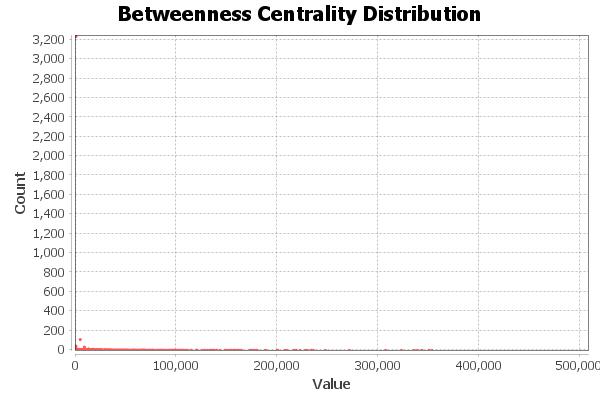</IMG><br /><br />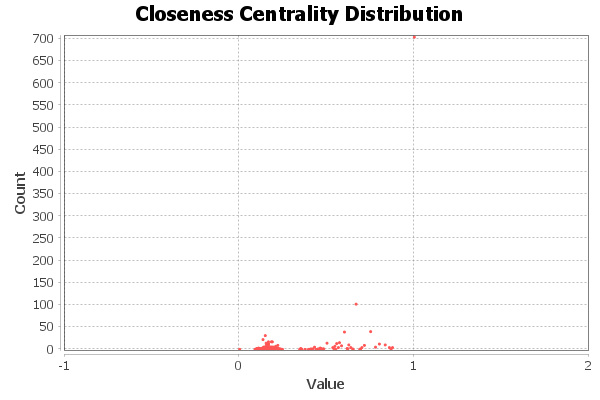</IMG><br /><br />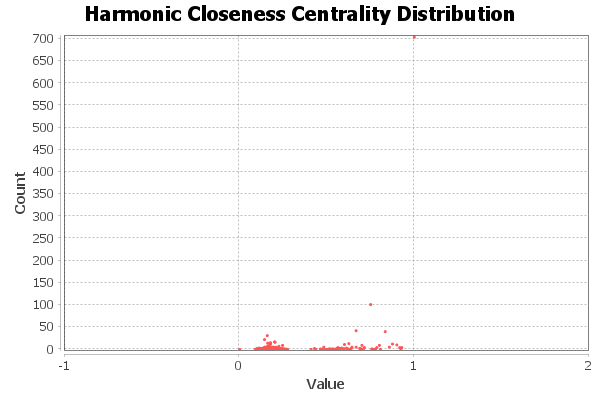</IMG><br /><br />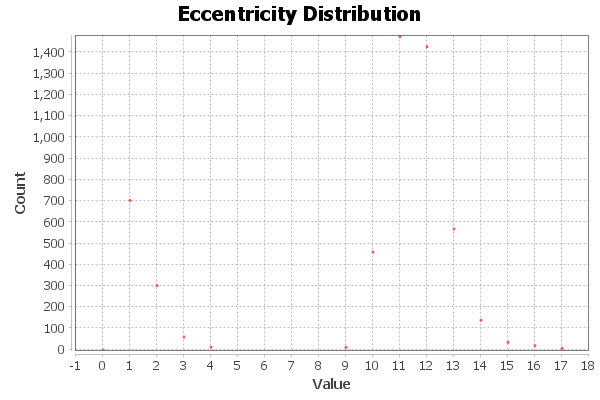</IMG><br /><br /><h2> Algorithm: </h2>Ulrik Brandes, <i>A Faster Algorithm for Betweenness Centrality</i>, in Journal of Mathematical Sociology 25(2):163-177, (2001)<br /></BODY> </HTML>

# **centrality measure:**

In [6]:
local_clustering = nx.clustering(G)
average_clustering = nx.average_clustering(G)
global_clustering = nx.transitivity(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)
degree_centrality = nx.degree_centrality(G)
max_degree = max(degree_centrality.values())
centralization_numerator = sum(max_degree - d for d in degree_centrality.values())
centralization_denominator = (len(G.nodes) - 1) * (len(G.nodes) - 2)
network_centralization = centralization_numerator / centralization_denominator
print(f"Local Clustering Coefficient: {local_clustering}")
print(f"Average Clustering Coefficient: {average_clustering:.4f}")
print(f"Global Clustering Coefficient: {global_clustering:.4f}")
print(f"Betweenness Centrality: {betweenness}")
print(f"Closeness Centrality: {closeness}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Network Centralization (Degree): {network_centralization:.8f}")

Local Clustering Coefficient: {3466: 0.21428571428571427, 937: 0.3, 5233: 1.0, 8579: 0.3, 10310: 0.05128205128205128, 15931: 0.2, 17038: 0.1323529411764706, 18720: 1.0, 19607: 0.6666666666666666, 1854: 0.25, 4583: 0.3333333333333333, 9572: 0.0659536541889483, 10841: 0.09523809523809523, 13056: 0.17777777777777778, 14982: 1.0, 16310: 0.08823529411764706, 19640: 0.24333333333333335, 23855: 0.14285714285714285, 24372: 0, 24814: 0.26666666666666666, 5052: 0.06157635467980296, 899: 0.6666666666666666, 1796: 1.0, 2287: 0.17582417582417584, 3096: 0.2727272727272727, 3386: 0.41818181818181815, 4472: 0.16666666666666666, 5346: 0.07894736842105263, 5740: 0, 6094: 0.5, 6376: 1.0, 9124: 0.09057971014492754, 10235: 0.1794871794871795, 10427: 0.2857142857142857, 10597: 0.2, 15159: 0.5, 16148: 0.11764705882352941, 16741: 0.23809523809523808, 18235: 0, 18549: 0, 19297: 0.075, 20511: 0.3165322580645161, 20595: 0.19444444444444445, 20613: 0.2, 24371: 0.14285714285714285, 24559: 0.05928853754940711, 2473

gephi:
<HTML> <BODY> <h1> Clustering Coefficient Metric Report </h1> <hr><br /><h2> Parameters: </h2>Network Interpretation:  undirected<br /><br><h2> Results: </h2>Average Clustering Coefficient: 0.687<br />Total triangles: 48282<br />The Average Clustering Coefficient is the mean value of individual coefficients.<br /><br />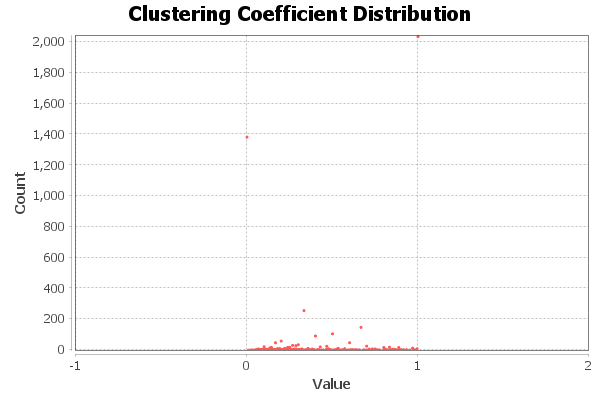</IMG><br /><br /><h2> Algorithm: </h2>Matthieu Latapy, <i>Main-memory Triangle Computations for Very Large (Sparse (Power-Law)) Graphs</i>, in Theoretical Computer Science (TCS) 407 (1-3), pages 458-473, 2008<br /></BODY> </HTML>

# finding important nodes:

Top 3 Betweenness Centrality Nodes: [(13801, 0.037027150433897676), (9572, 0.025689005573850524), (14599, 0.025488418054511023)]
Top 3 Closeness Centrality Nodes: [(13801, 0.19428463503141283), (14485, 0.18953808583111678), (9572, 0.18903821471838708)]
Top 3 Degree Centrality Nodes: [(21012, 0.015455065827132226), (21281, 0.01507345926349933), (22691, 0.014691852699866437)]


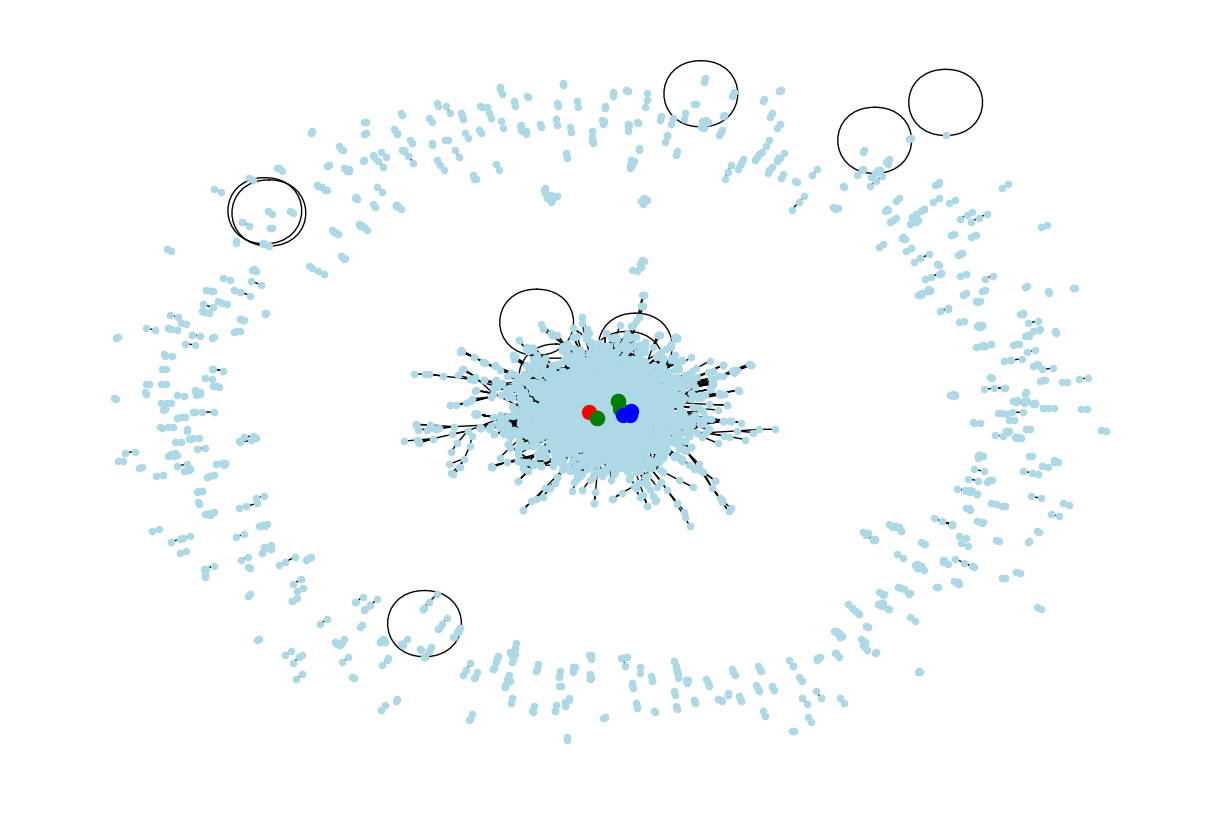

In [7]:
top_3_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]

print(f"Top 3 Betweenness Centrality Nodes: {top_3_betweenness}")
print(f"Top 3 Closeness Centrality Nodes: {top_3_closeness}")
print(f"Top 3 Degree Centrality Nodes: {top_3_degree}")

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=20, node_color='lightblue', with_labels=False)

for node, _ in top_3_betweenness:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=100, node_color='red')

for node, _ in top_3_closeness:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=100, node_color='green')

for node, _ in top_3_degree:
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=100, node_color='blue')


<HTML> <BODY> <h1>Degree Report </h1> <hr><br> <h2> Results: </h2>Average Degree: 5.527<br /><br />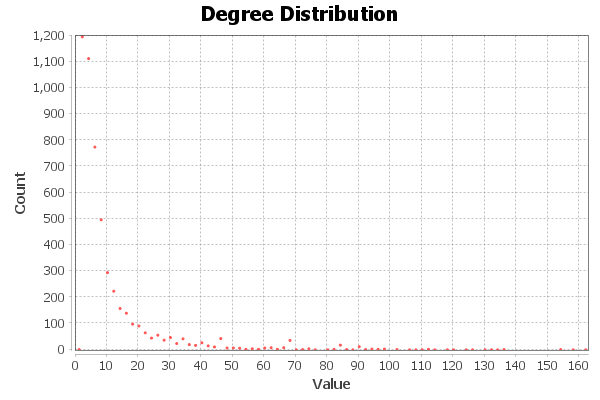</IMG><br /><br />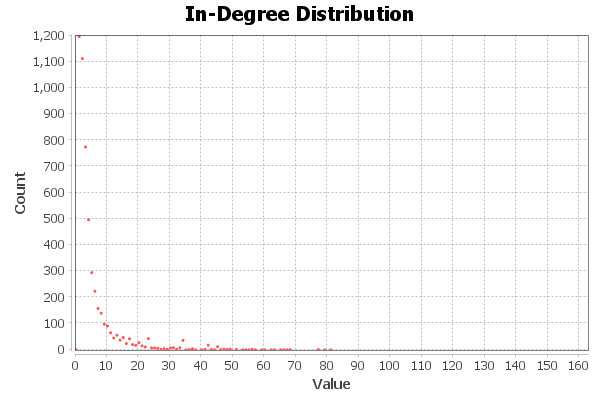</IMG><br /><br />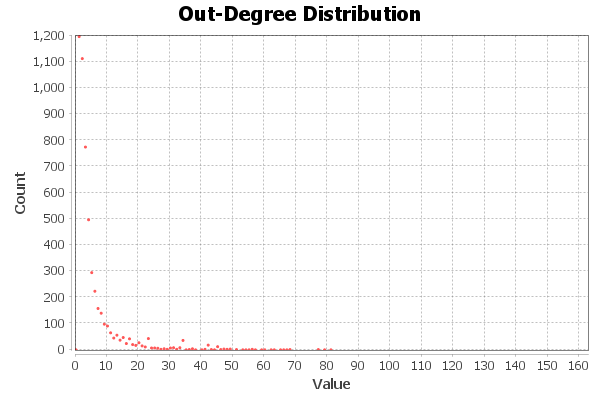</IMG></BODY></HTML>
<HTML> <BODY> <h1>Graph Distance  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br /><br /> <h2> Results: </h2>Diameter: 17<br />Radius: 0<br />Average Path length: 6.04851437671036<br />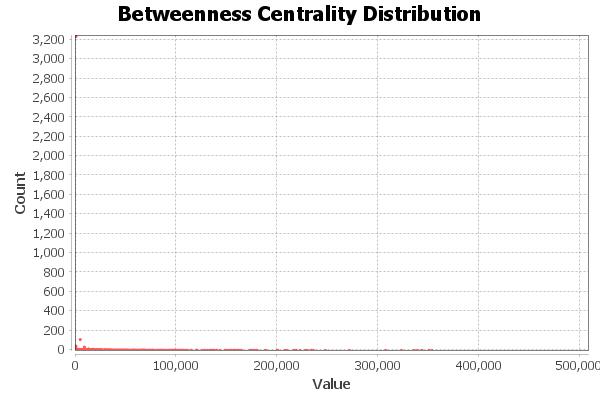</IMG><br /><br />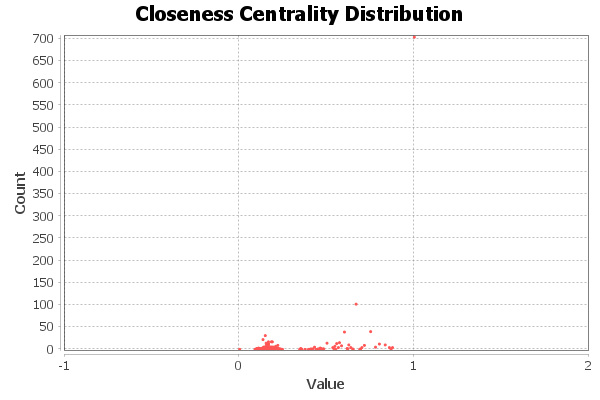</IMG><br /><br />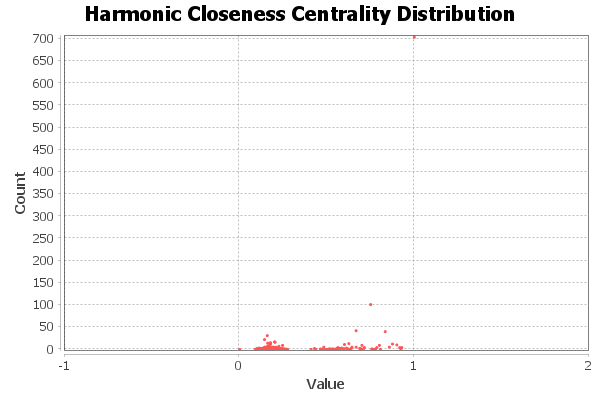</IMG><br /><br />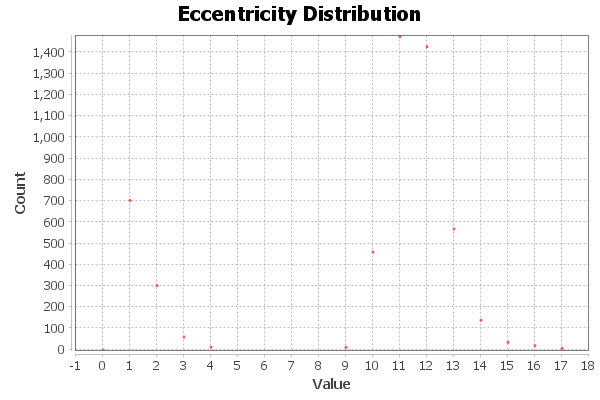</IMG><br /><br /><h2> Algorithm: </h2>Ulrik Brandes, <i>A Faster Algorithm for Betweenness Centrality</i>, in Journal of Mathematical Sociology 25(2):163-177, (2001)<br /></BODY> </HTML>
<HTML> <BODY> <h1>Graph Density  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br><br> <h2> Results: </h2>Density: 0.001</BODY></HTML>
<HTML> <BODY> <h1>Graph Distance  Report </h1> <hr><br><h2> Parameters: </h2>Network Interpretation:  undirected<br /><br /> <h2> Results: </h2>Diameter: 17<br />Radius: 0<br />Average Path length: 6.04851437671036<br />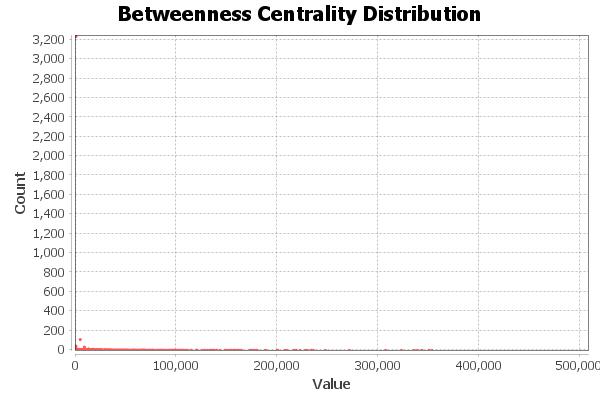</IMG><br /><br />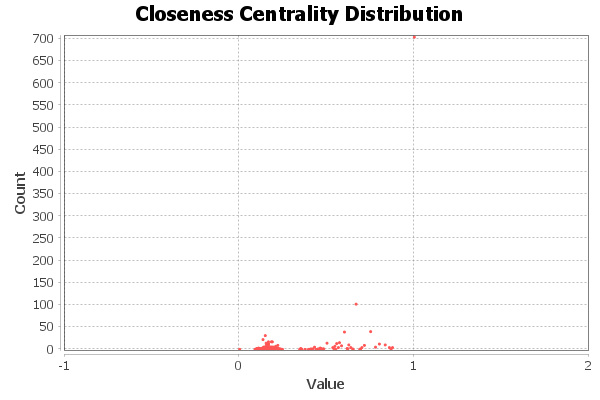</IMG><br /><br />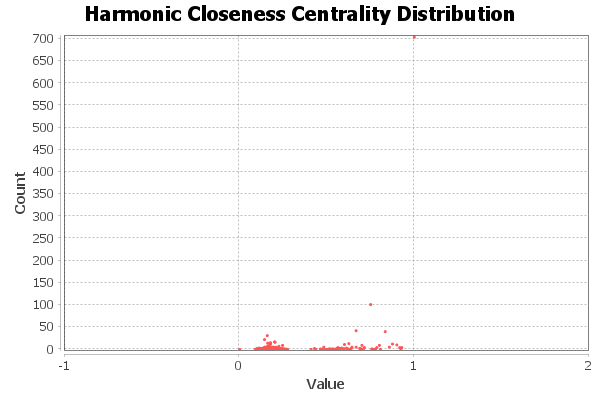</IMG><br /><br />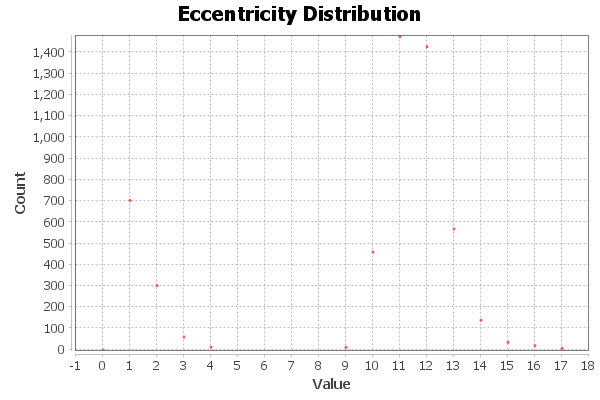</IMG><br /><br /><h2> Algorithm: </h2>Ulrik Brandes, <i>A Faster Algorithm for Betweenness Centrality</i>, in Journal of Mathematical Sociology 25(2):163-177, (2001)<br /></BODY> </HTML>

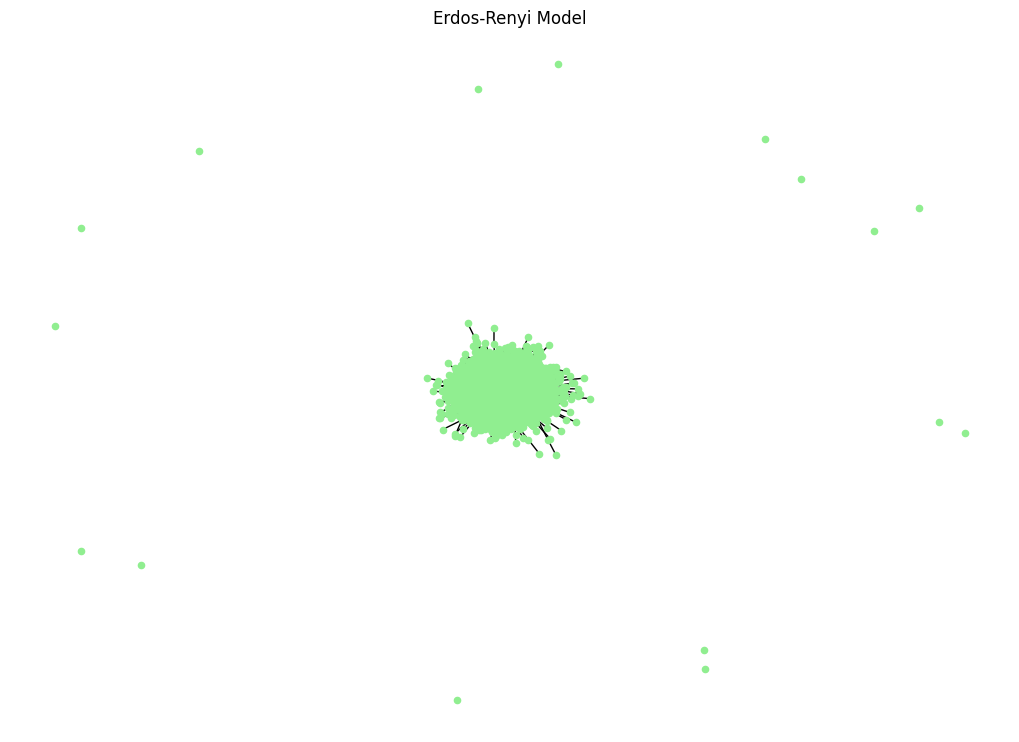

In [8]:
p_er = density
G_er = nx.erdos_renyi_graph(num_nodes, p_er)

plt.figure(figsize=(10, 7))
nx.draw(G_er, with_labels=False, node_size=20, node_color='lightgreen')
plt.title("Erdos-Renyi Model")
plt.show()


# BA model

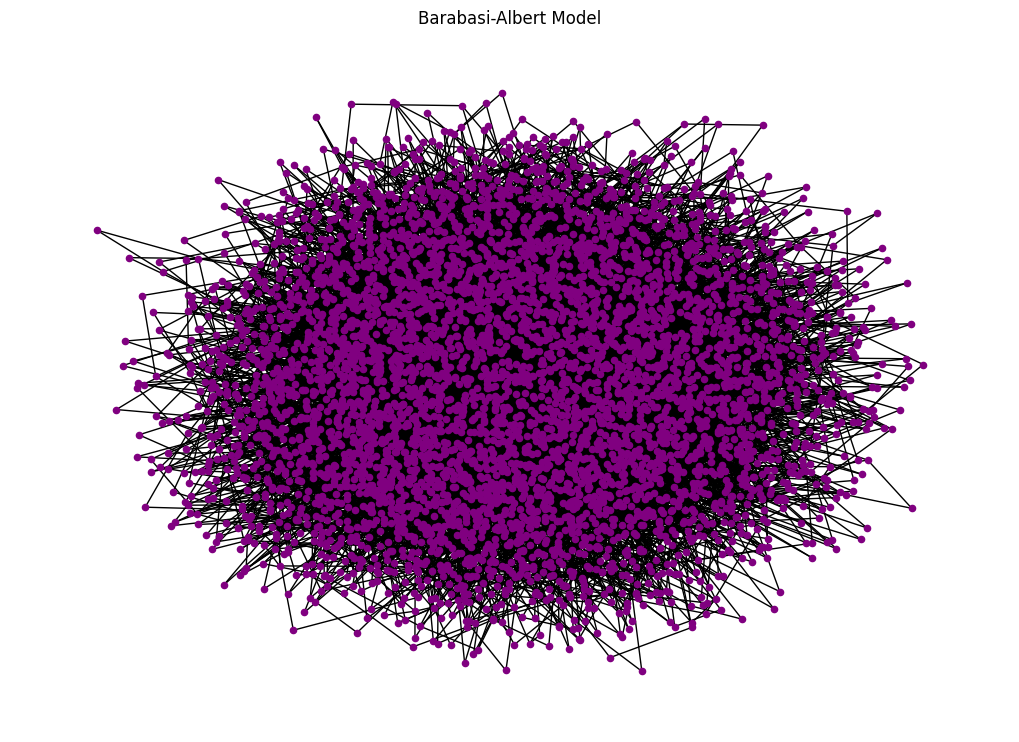

In [9]:
m_ba = int(average_degree / 2)
G_ba = nx.barabasi_albert_graph(num_nodes, m_ba)
plt.figure(figsize=(10, 7))
nx.draw(G_ba, with_labels=False, node_size=20, node_color='purple')
plt.title("Barabasi-Albert Model")
plt.show()


# ws

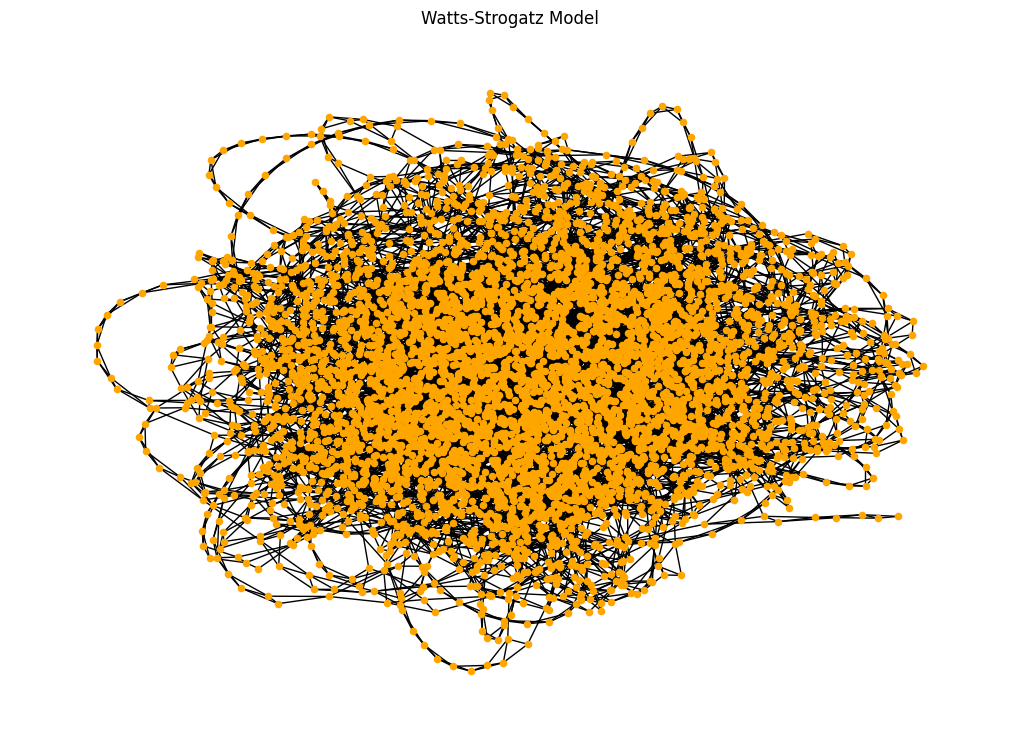

In [10]:
k_ws = int(average_degree)
p_ws = 0.1
G_ws = nx.watts_strogatz_graph(num_nodes, k_ws, p_ws)

plt.figure(figsize=(10, 7))
nx.draw(G_ws, with_labels=False, node_size=20, node_color='orange')
plt.title("Watts-Strogatz Model")
plt.show()



1. مدل Erdős-Rényi (ER):
   - در این مدل، دو گره با احتمال  p به یکدیگر متصل می‌شوند و به احتمال 1-p به هم وصل نمی شوند.
   - انتخاب پارامترp: که با توجه به چگالی شبکه اصلی محاسبه می‌شود. چگالی شبکه برابر است با نسبت تعداد یال‌ها به تعداد حداکثر یال‌های ممکن.   
2. مدل Watts-Strogatz (WS):
   - در این مدل، یک شبکه حلقه‌ای با تعداد مشخصی یال برای هر گره و با احتمال  p برای پیوند یال‌ها تشکیل می‌شود.
   - انتخاب پارامترها: تعداد همسایه‌های هر گره  k  که برابر با میانگین درجه شبکه اصلی است و احتمال p  که معمولاً مقداری کوچک بین 0 و 1 است.
3. مدل Barabási-Albert (BA):
   - در این مدل، شبکه با اضافه کردن تدریجی گره‌ها و اتصال آن‌ها به گره‌های موجود بر اساس درجه آن‌ها ساخته می‌شود.
   - انتخاب پارامتر: تعداد یال‌های جدید  m که هر گره جدید به  m گره موجود متصل می‌شود و برابر با نصف میانگین درجه شبکه اصلی است.
 توضیحات:
1. مدل ER:
   - احتمال اتصال p  بر اساس چگالی شبکه اصلی محاسبه می‌شود.
   - چگالی شبکه اصلی برابر است با نسبت تعداد یال‌ها به تعداد حداکثر یال‌های ممکن.
2. مدل WS:
   - تعداد همسایه‌های هر گره  k  بر اساس میانگین درجه شبکه اصلی انتخاب می‌شود.
   - احتمال p مقداری کوچک است تا ویژگی‌های شبکه‌های کوچک‌جهانی حفظ شود.
3. مدل BA:
   - تعداد یال‌های جدید  m که هر گره جدید به  m گره موجود متصل می‌شود، برابر با نصف میانگین درجه شبکه اصلی انتخاب می‌شود.

این کد  مدل‌های ER، WS و BA را بر اساس پارامترهای محاسبه شده فیت می‌کند و در نهایت، گراف‌های حاصل از این مدل‌ها را نمایش می‌دهد.


# comparing models


In [11]:
def print_graph_properties(G, name):
    print(f"Properties of {name}:")
    print(f"Number of Nodes: {G.number_of_nodes()}")
    print(f"Number of Edges: {G.number_of_edges()}")
    print(f"Average Degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
    print(f"Density: {nx.density(G):.4f}")
    print(f"Average Clustering Coefficient: {nx.average_clustering(G):.4f}")
    if nx.is_connected(G):
        print(f"Diameter: {nx.diameter(G)}")
        print(f"Average Shortest Path Length: {nx.average_shortest_path_length(G):.4f}")
    else:
        print("Graph is not connected.")
    print("-" * 40)
print_graph_properties(G, "Original Network")
print_graph_properties(G_er, "ER Model")
print_graph_properties(G_ws, "WS Model")
print_graph_properties(G_ba, "BA Model")

Properties of Original Network:
Number of Nodes: 5242
Number of Edges: 14496
Average Degree: 5.53
Density: 0.0011
Average Clustering Coefficient: 0.5296
Graph is not connected.
----------------------------------------
Properties of ER Model:
Number of Nodes: 5242
Number of Edges: 14401
Average Degree: 5.49
Density: 0.0010
Average Clustering Coefficient: 0.0011
Graph is not connected.
----------------------------------------
Properties of WS Model:
Number of Nodes: 5242
Number of Edges: 10484
Average Degree: 4.00
Density: 0.0008
Average Clustering Coefficient: 0.3701
Diameter: 22
Average Shortest Path Length: 11.3944
----------------------------------------
Properties of BA Model:
Number of Nodes: 5242
Number of Edges: 10480
Average Degree: 4.00
Density: 0.0008
Average Clustering Coefficient: 0.0057
Diameter: 8
Average Shortest Path Length: 4.8164
----------------------------------------


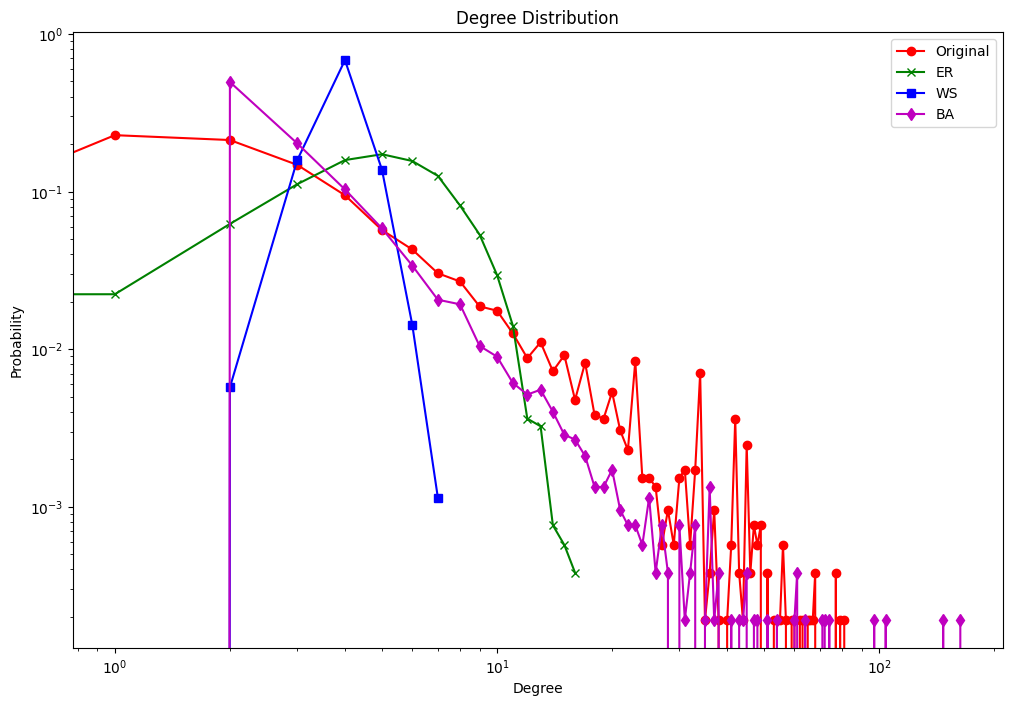

Original Network:
Clustering Coefficient 2: 0.6294
Diameter: 17

ER Model:
Clustering Coefficient 2: 0.0011
Diameter: 10

WS Model:
Clustering Coefficient 2: 0.3515
Diameter: 22

BA Model:
Clustering Coefficient 2: 0.0020
Diameter: 8



In [12]:
def degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degree_count = np.bincount(degree_sequence)
    degree_prob = degree_count / sum(degree_count)
    return degree_prob
def clustering_coefficient_2(G):
    triangles = sum(nx.triangles(G).values()) / 3
    triplets = sum([d * (d - 1) / 2 for n, d in G.degree()])
    return 3 * triangles / triplets
def graph_diameter(G):
    if nx.is_connected(G):
        return nx.diameter(G)
    else:
        return max(nx.diameter(G.subgraph(c).copy()) for c in nx.connected_components(G))
degree_dist_original = degree_distribution(G)
clustering_coeff_original = clustering_coefficient_2(G)
diameter_original = graph_diameter(G)
degree_dist_er = degree_distribution(G_er)
clustering_coeff_er = clustering_coefficient_2(G_er)
diameter_er = graph_diameter(G_er)
degree_dist_ws = degree_distribution(G_ws)
clustering_coeff_ws = clustering_coefficient_2(G_ws)
diameter_ws = graph_diameter(G_ws)
degree_dist_ba = degree_distribution(G_ba)
clustering_coeff_ba = clustering_coefficient_2(G_ba)
diameter_ba = graph_diameter(G_ba)
plt.figure(figsize=(12, 8))
plt.loglog(range(len(degree_dist_original)), degree_dist_original, 'r-', marker='o', label='Original')
plt.loglog(range(len(degree_dist_er)), degree_dist_er, 'g-', marker='x', label='ER')
plt.loglog(range(len(degree_dist_ws)), degree_dist_ws, 'b-', marker='s', label='WS')
plt.loglog(range(len(degree_dist_ba)), degree_dist_ba, 'm-', marker='d', label='BA')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.legend()
plt.show()
print(f"Original Network:")
print(f"Clustering Coefficient 2: {clustering_coeff_original:.4f}")
print(f"Diameter: {diameter_original}\n")

print(f"ER Model:")
print(f"Clustering Coefficient 2: {clustering_coeff_er:.4f}")
print(f"Diameter: {diameter_er}\n")

print(f"WS Model:")
print(f"Clustering Coefficient 2: {clustering_coeff_ws:.4f}")
print(f"Diameter: {diameter_ws}\n")

print(f"BA Model:")
print(f"Clustering Coefficient 2: {clustering_coeff_ba:.4f}")
print(f"Diameter: {diameter_ba}\n")

4.
1.	توزیع درجه:
•	شبکه اصلی (Original): توزیع درجه شبکه اصلی نشان‌دهنده یک توزیع پیچیده و گسترده است که ممکن است نشانه‌ای از ساختارهای متنوع در شبکه باشد.
•	مدل ER: توزیع درجه مدل ER به صورت تصادفی است و تعداد زیادی گره با درجه کم دارد.
•	مدل WS: توزیع درجه مدل WS شبیه به شبکه اصلی است و خوشه‌بندی خوبی دارد.
•	مدل BA: توزیع درجه مدل BA به صورت بی‌مقیاس (scale-free) است که برخی از گره‌ها دارای درجه بسیار بالا هستند. این مدل معمولاً برای شبکه‌های واقعی با ساختار بی‌مقیاس مناسب است.
2.	Clustering Coefficient 2:
•	شبکه اصلی (Original): 0.6294
•	مدل ER: 0.0011 (خیلی پایین‌تر از شبکه اصلی)
•	مدل WS: 0.3515 (نزدیک‌تر به شبکه اصلی)
•	مدل BA: 0.0020 (خیلی پایین‌تر از شبکه اصلی)
3.	قطر شبکه (Diameter):
•	شبکه اصلی (Original): 17
•	ER: 10خیلی کمتر از شبکه اصلی)
•	WS: 22نزدیک به شبکه اصلی)
•	BA: 8خیلی کمتر از شبکه اصلی)
نتیجه‌گیری:
بر اساس معیارهای مورد بررسی:
•	مدل ER به دلیل Clustering Coefficient و قطر شبکه بسیار پایین، نمی‌تواند به خوبی ساختار شبکه اصلی را تقلید کند.
•	مدل BA اگرچه توزیع درجه مناسبی دارد، اما Clustering Coefficient و قطر شبکه آن به شبکه اصلی نزدیک نیست.
مدل WS به نظر می‌رسد نزدیک‌ترین مدل به شبکه اصلی باشد. این مدل دارای Clustering Coefficient و قطر شبکه نزدیک به شبکه اصلی است و همچنین توزیع درجه مناسبی دارد.
بنابراین، مدل WS (Watts-Strogatz) بهترین مدل برای فیت کردن شبکه اصلی و نزدیک‌ترین مدل به دنیای واقعی است.



# clique

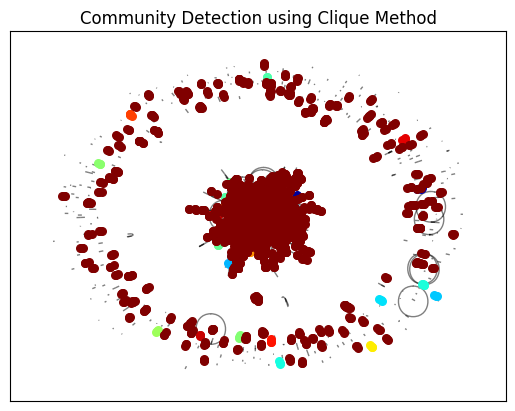

In [25]:
cliques = list(nx.find_cliques(G))
communities = {frozenset(clique) for clique in cliques if len(clique) > 2}
pos = nx.spring_layout(G)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in range(len(communities))]
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=[colors[i]], node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Detection using Clique Method")
plt.show()


# raddichi:

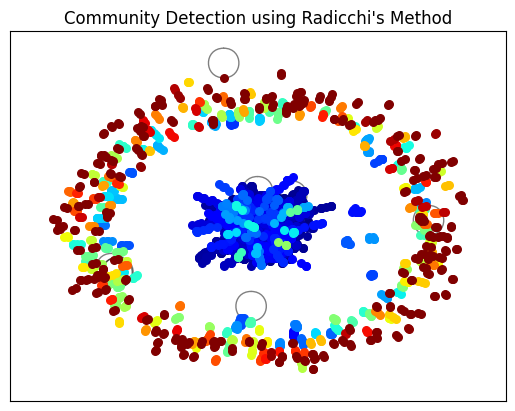

Modularity (Radicchi Method): 0.819616


In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
pos = nx.spring_layout(G)
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in range(len(communities))]
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=[colors[i]], node_size=30)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Community Detection using Radicchi's Method")
plt.show()
# محاسبه ماژولاریتی
communities_list = [list(community) for community in communities]
modularity = nx.algorithms.community.modularity(G, communities_list)
print(f"Modularity (Radicchi Method): {modularity:.6f}")

gephi girvan newman
<html> <body><h1>Girvan-Newman Report</h1><hr><h2>Parameters:</h2><table><tr><td>Respect edge type for shortest path betweeness:</td><td>yes</td></tr><tr><td>Respect parallel edges for shortest path betweeness:</td><td>yes</td></tr><tr><td colspan = 2></td></tr><tr><td>Respect edge type for modularity computation:</td><td>yes</td></tr><tr><td>Respect parallel edges for modularity computation:</td><td>yes</td></tr></table><br /><br /><h2>Processed Graph Data</h2><table><tr><td>Nodes:</td><td>5244</td></tr><tr><td>Edges</td><td>14497</td></tr></table><br /><table><tr><td>Processing time: 2658.578 sec.</td></tr></table><br /><br /><h2>Communities</h2><table><tr><td>Number of communities:</td><td>434</td></tr><tr><td>Maximum found modularity:</td><td>0.84918505</td></tr></table><br /><br />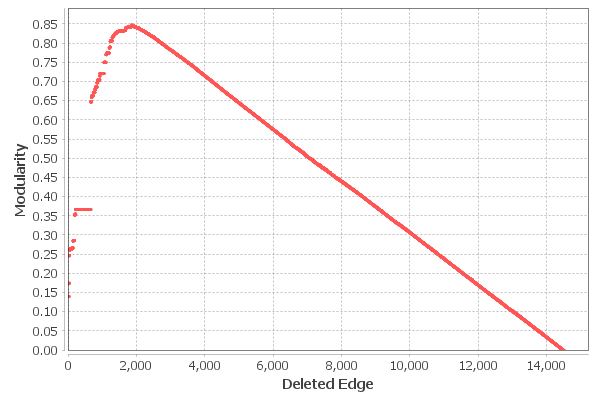</IMG><br /><br /></body></html>


Modularity
<HTML> <BODY> <h1>Modularity Report </h1> <hr><h2> Parameters: </h2>Randomize:  On<br>Use edge weights:  On<br>Resolution:  1.0<br><br> <h2> Results: </h2>Modularity: 0.858<br>Modularity with resolution: 0.858<br>Number of Communities: 392<br /><br />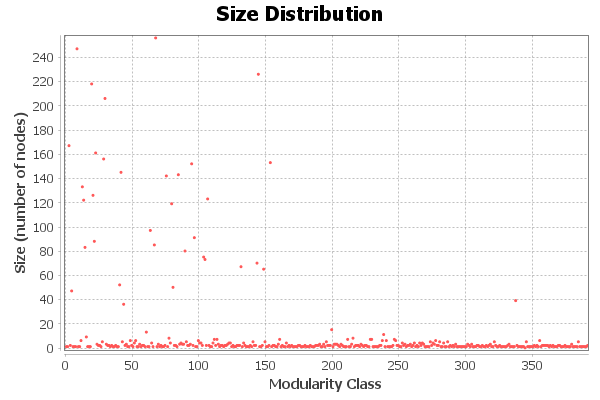</IMG><br /><br /><h2> Algorithm: </h2>Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Etienne Lefebvre, <i>Fast unfolding of communities in large networks</i>, in Journal of Statistical Mechanics: Theory and Experiment 2008 (10), P1000<br /><br /><br /><h2> Resolution: </h2>R. Lambiotte, J.-C. Delvenne, M. Barahona <i>Laplacian Dynamics and Multiscale Modular Structure in Networks 2009<br /></BODY> </HTML>


•	مقدار ماژولاریتی 0.82 نشان‌دهنده یک جامعه‌بندی خوب و معنادار است. گره‌ها به خوبی در جوامع مرتبط دسته‌بندی شده‌اند و ساختار شبکه به خوبی نمایان است.
•	نمودار نشان می‌دهد که شبکه دارای ساختار مرکزی-حاشیه‌ای است که می‌تواند به معنای وجود یک هسته مرکزی با ارتباطات قوی‌تر و یک حلقه حاشیه‌ای با ارتباطات کمتر باشد.


girwan newman

In [ ]:
!pip install pandas networkx matplotlib node2vec scikit-learn


Computing transition probabilities:   0%|          | 0/5242 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


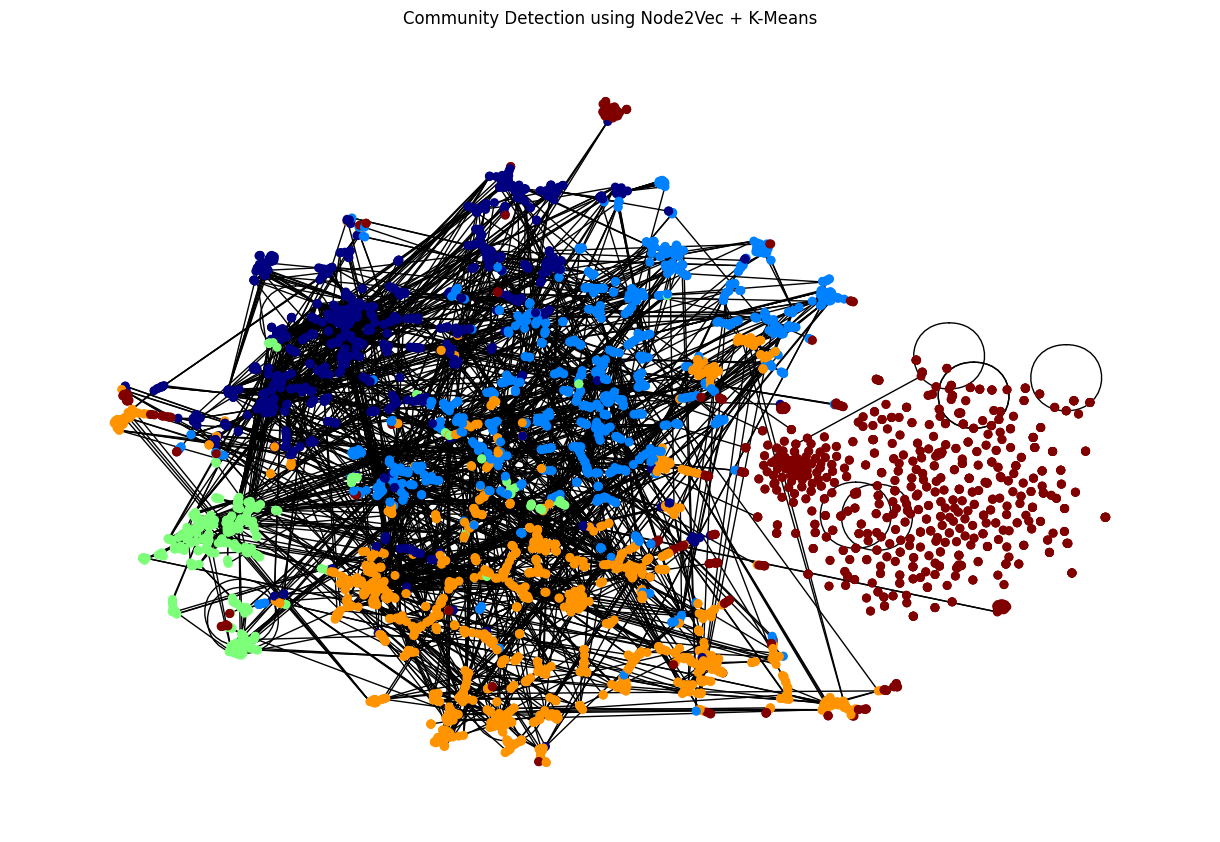

Modularity: 0.681161


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
embeddings = [model.wv[str(node)] for node in G.nodes()]
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(embeddings)
pca = PCA(n_components=20)
pca_result = pca.fit_transform(embeddings)
tsne = TSNE(n_components=2, random_state=42)
node_pos = tsne.fit_transform(pca_result)
plt.figure(figsize=(12, 8))
cmap = plt.get_cmap('jet')
nx.draw(G, pos={node: node_pos[i] for i, node in enumerate(G.nodes())},
        node_color=labels, node_size=30, cmap=cmap, with_labels=False)
plt.title("Community Detection using Node2Vec + K-Means")
plt.show()
partition = {node: labels[i] for i, node in enumerate(G.nodes())}
communities = [[node for node, label in partition.items() if label == i] for i in range(kmeans.n_clusters)]
modularity = nx.algorithms.community.modularity(G, communities)
print(f"Modularity: {modularity:.6f}")

# تشخیص جوامع با استفاده از Node2Vec و K-Means:
ایجاد مدل Node2Vec: یک مدل Node2Vec با پارامترهای مشخص ایجاد می‌کند.
   - `G`: گراف ورودی
   - `dimensions=64`: تعداد ابعاد برای تعبیه‌سازی
   - `walk_length=30`: طول هر گام تصادفی
   - `num_walks=200`: تعداد گام‌های تصادفی برای هر گره
   - `workers=4`: تعداد پردازشگرهای موازی
آموزش مدل Node2Vec: مدل Node2Vec را با استفاده از پارامترهای مشخص آموزش می‌دهد.
   - `window=10`: اندازه پنجره برای Word2Vec
   - `min_count=1`: حداقل تعداد دفعات مشاهده یک گره
   - `batch_words=4`: تعداد کلمات در هر بچ
استخراج embedding: embeddingهای گره‌ها را از مدل آموزش‌دیده استخراج می‌کند.
خوشه‌بندی K-Means: الگوریتم K-Means را برای خوشه‌بندی تعبیه‌سازی‌ها اجرا می‌کند.
   - `n_clusters=5`: تعداد خوشه‌ها
   - `random_state=42`: مقدار تصادفی برای تکرارپذیری

کاهش ابعاد با PCA: از PCA برای کاهش ابعاد تعبیه‌سازی‌ها به 20 بعد استفاده می‌کند.
کاهش ابعاد با t-SNE: از t-SNE برای کاهش ابعاد بیشتر به 2 بعد استفاده می‌کند تا بتواند نتایج را بصری کند.
رسم گراف: گراف را با استفاده از موقعیت‌های کاهش یافته و رنگ‌های مختلف برای هر خوشه رسم می‌کند.
محاسبه ماژولاریتی:
   - `partition`: ایجاد یک دیکشنری که به هر گره یک برچسب خوشه اختصاص می‌دهد.
   - `communities`: ایجاد لیستی از جوامع بر اساس برچسب‌های خوشه.
   - `modularity`: محاسبه و نمایش ماژولاریتی گراف برای بررسی کیفیت تقسیم‌بندی جوامع.
ماژولاریتی نشان‌دهنده کیفیت تقسیم‌بندی جوامع در یک شبکه است. ماژولاریتی بالاتر نشان‌دهنده این است که گره‌ها به خوبی درون جوامع منطقی و معنادار قرار گرفته‌اند. ماژولاریتی محاسبه شده برای این روش برابر با `0.681161` است، که نشان می‌دهد که این تقسیم‌بندی به خوبی گره‌ها را در جوامع قرار داده است.
روش Node2Vec + K-Means: این روش از تعبیه‌سازی گره‌ها و خوشه‌بندی K-Means برای تشخیص جوامع استفاده می‌کند.
